In [49]:
#Import Python Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import xml.etree.ElementTree as etree 
from datetime import datetime, timedelta
import os
import json
import pandas as pd
import numpy as np
from pytz import common_timezones, all_timezones, timezone
import math

In [50]:
#activity_file = "D:/downloads/activity_873783146.tcx" # Naul cycle with Barry
#activity_file = "D:/downloads/activity_898238015.tcx" # Great Dublin Cycle

# Define name and path of data file
# This data file contains a sub-set of activiy information relating to speed and time

input_file = 'activity_898238015.json' # Great Dublin Cycle
input_dir = os.path.join("/", "opt","jupyter","data","csv" )
input_file_path = os.path.join(input_dir , input_file)

output_file = 'activity_input.csv'
output_dir = os.path.join("/", "opt","jupyter","data","csv" )
output_file_path = os.path.join(input_dir , output_file)

print ("Input file is (full path)  ", input_file_path)
print ("Output file is (full path)  ", output_file_path)

Input file is (full path)   /opt/jupyter/data/csv/activity_898238015.json
Output file is (full path)   /opt/jupyter/data/csv/activity_input.csv


In [51]:
with open(input_file_path) as file_obj:
    i = 0
    for lines in file_obj:
        print(lines[:650])

{"data_points": [{"cadence": 76, "latitude": 53.36370773613453, "distance": 5.010000228881836, "heart_rate": 103, "time": "2015-09-13T06:25:51", "longitude": -6.190182846039534, "altitude": 79.4000015258789}, {"cadence": 83, "latitude": 53.363760793581605, "distance": 28.09000015258789, "heart_rate": 106, "time": "2015-09-13T06:25:56", "longitude": -6.190518541261554, "altitude": 90.80000305175781}, {"cadence": 84, "latitude": 53.36377898231149, "distance": 34.7400016784668, "heart_rate": 106, "time": "2015-09-13T06:25:57", "longitude": -6.1906137596815825, "altitude": 90.80000305175781}, {"cadence": 85, "latitude": 53.363817036151886, "dista


In [52]:
with open(input_file_path, 'r') as json_data:
    d = json.load(json_data)

In [53]:
df = pd.DataFrame.from_dict(d['data_points'])
number_data_points = len(df)
print("Number of data points is {:,}".format(number_data_points))
df.head()

Number of data points is 5,358


,altitude,cadence,distance,heart_rate,latitude,longitude,time
0,79.400002,76,5.010000,103,53.363708,-6.190183,2015-09-13T06:25:51
1,90.800003,83,28.090000,106,53.363761,-6.190519,2015-09-13T06:25:56
2,90.800003,84,34.740002,106,53.363779,-6.190614,2015-09-13T06:25:57
3,90.800003,85,40.650002,108,53.363817,-6.190668,2015-09-13T06:26:00
4,90.800003,87,52.090000,110,53.363877,-6.190771,2015-09-13T06:26:03


/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


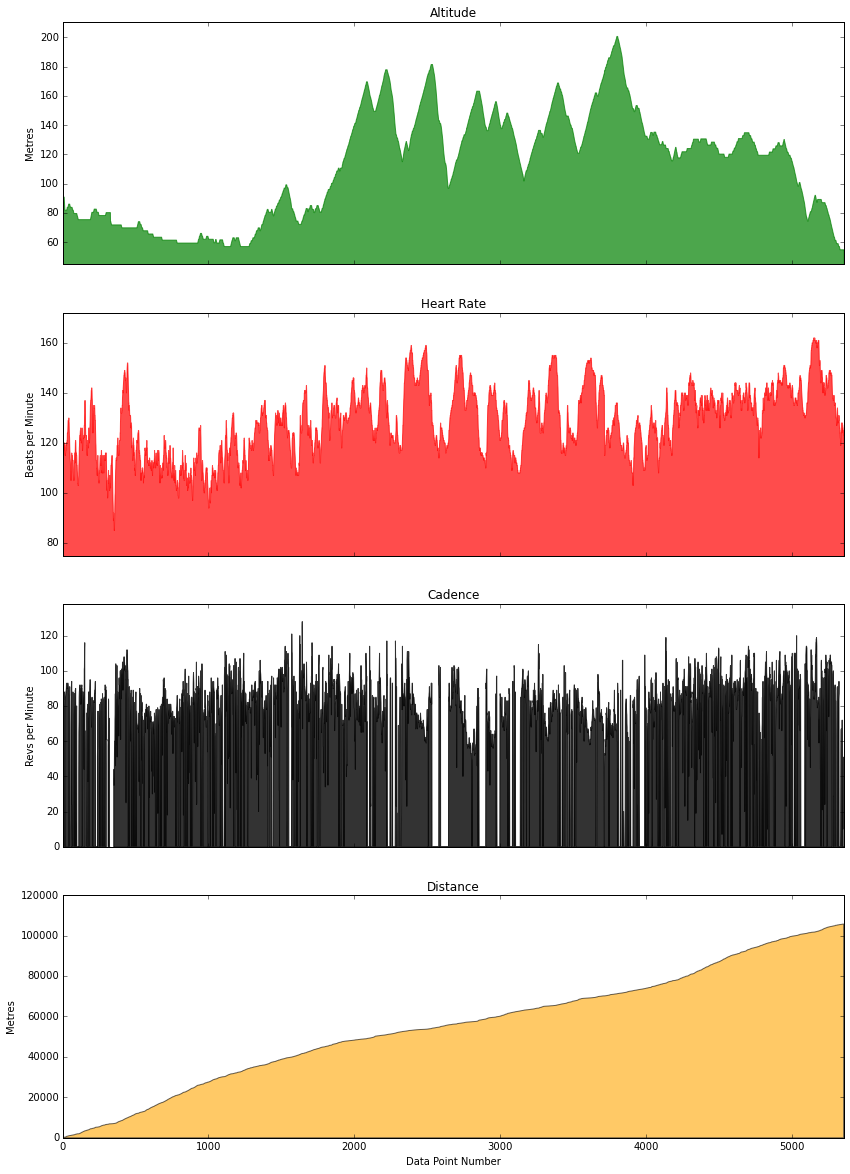

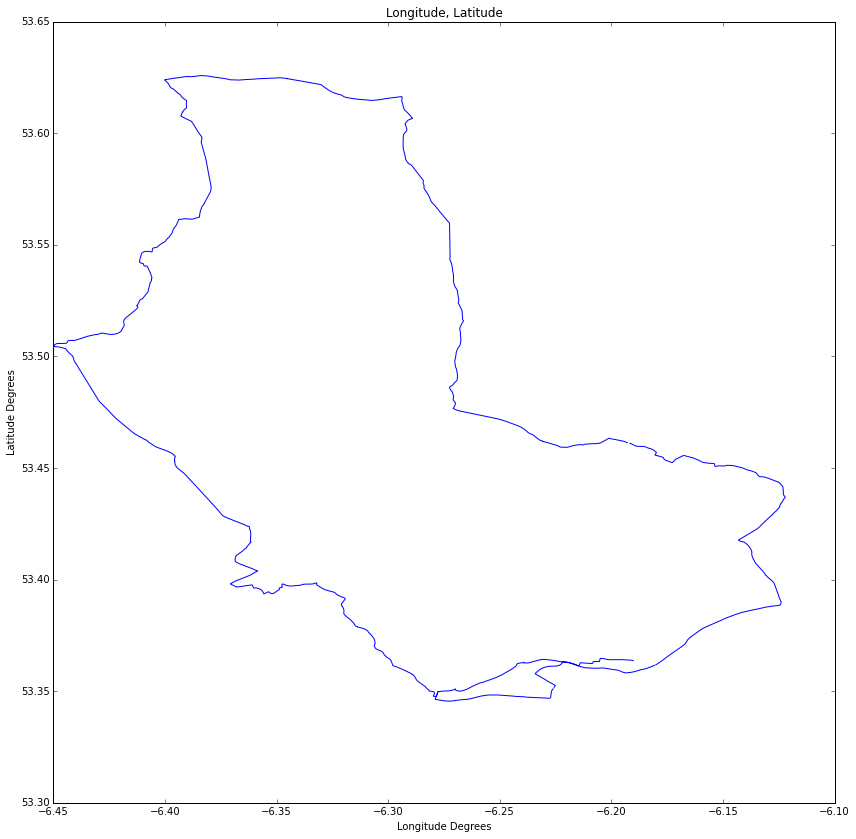

In [54]:
# new style method 2; use an axes array
fig, axs = plt.subplots(4, 1, sharex=True,  figsize=(14, 20))

axs[0].fill_between(range(len(df)),df.altitude,  
                    facecolor='green', 
                    alpha=0.7,
                   color = 'green')
axs[0].set_ylabel('Metres')
axs[0].set_title('Altitude')
axs[0].set_ylim( [min(df.altitude) - 10, max(df.altitude) + 10])

axs[1].fill_between(range(len(df)),df.heart_rate,  
                    facecolor='red', 
                    alpha=0.7,
                   color = 'red')
axs[1].set_ylabel('Beats per Minute')
axs[1].set_title('Heart Rate')
axs[1].set_ylim( [min(df.heart_rate) - 10, max(df.heart_rate) + 10])

axs[2].fill_between(range(len(df)),df.cadence,  
                    facecolor='black', alpha = .8)
axs[2].set_ylabel('Revs per Minute')
axs[2].set_title('Cadence')
axs[2].set_ylim( [0, max(df.cadence) + 10])

axs[3].fill_between(range(len(df)),df.distance.fillna(method = 'bfill'),  facecolor='orange',alpha = .6)
axs[3].set_ylabel('Metres')
axs[3].set_title('Distance')
axs[3].set_xlim( [0, len(df)])
axs[3].set_xlabel('Data Point Number')



fig2, axs2 = plt.subplots(1,1,  figsize=(14, 14))
axs2.set_title('Longitude, Latitude')
axs2.set_xlabel('Longitude Degrees')
axs2.set_ylabel('Latitude Degrees')
_ = axs2.plot(df.longitude, df.latitude)

### Detect  Data Frame  for missing values

In [55]:
df_missing = pd.DataFrame(index = df.index)
df_missing['distance'] = df.distance.apply(lambda x: pd.isnull(x) )
df_missing['cadence'] = df.cadence.apply(lambda x: pd.isnull(x) )
df_missing['heart_rate'] = df.heart_rate.apply(lambda x: pd.isnull(x) )
df_missing['altitude'] = df.altitude.apply(lambda x: pd.isnull(x) )

In [56]:
df_missing.sum()

distance      11
cadence       46
heart_rate     0
altitude       0
dtype: int64

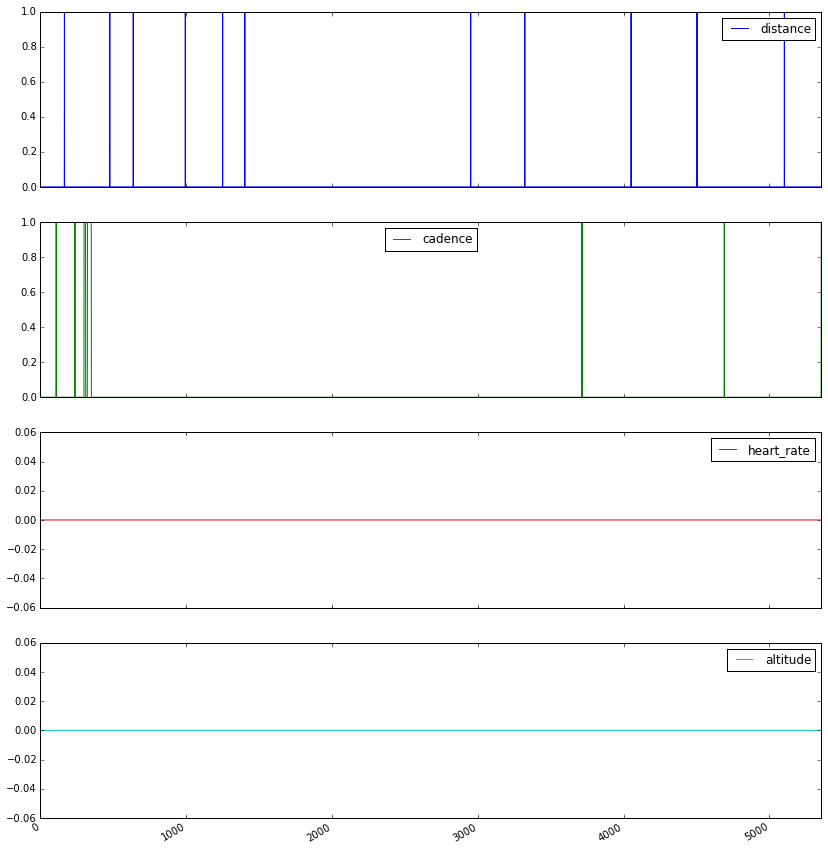

In [18]:
_ = df_missing.plot(figsize=(14, 16), subplots=True)

## Fix Missing Values

In [57]:
df[ (df.cadence.isnull() == True) | (df.distance.isnull() == True)].head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time
109,75.400002,NaN,1977.489990,103,53.361328,-6.214706,2015-09-13T06:31:08
110,75.400002,NaN,1983.209961,106,53.361323,-6.214791,2015-09-13T06:31:10
166,75.400002,0,NaN,119,NaN,NaN,2015-09-13T06:35:22
238,80.400002,NaN,5270.680176,107,53.354209,-6.256836,2015-09-13T06:39:29
301,80.199997,NaN,6618.569824,111,53.350090,-6.273613,2015-09-13T06:43:35


In [58]:
df.fillna(method='ffill', inplace = True) # last know value method

In [59]:
df[ (df.cadence.isnull() == True) | (df.distance.isnull() == True)].head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time


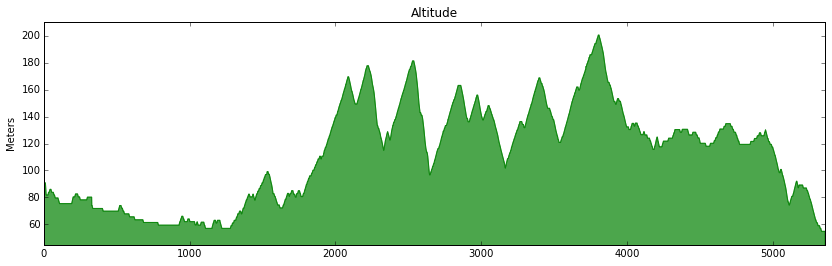

In [85]:
plt.figure(figsize=(14, 4))
_ = df.altitude.plot(kind = 'area',
                    alpha=0.7,
                   color = 'green')
plt.ylabel('Meters')
plt.title('Altitude')
_ = plt.ylim( [min(df.altitude) - 10, max(df.altitude) + 10])


In [6]:
print("Number of missing altitude data points is {:,}"\
.format( number_data_points - df.altitude.count() ) )

Number of missing altitude data points is 0


In [16]:
df[ df.altitude.isnull() == True ]

,altitude,cadence,distance,heart_rate,latitude,longitude,time


Altitude data looks good - no missing data

### Check altitude data for missing values

(75, 172)

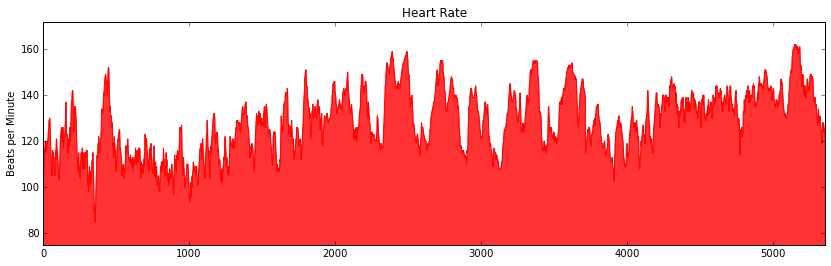

In [17]:
plt.figure(figsize=(14, 4))
_ = df.heart_rate.plot(kind = 'area',
                      alpha=0.8,
                   color = 'red')
plt.ylabel('Beats per Minute')
plt.title('Heart Rate')
plt.ylim( [min(df.heart_rate) - 10, max(df.heart_rate) + 10])

In [18]:
print("Number of missing heartrate data points is {:,}"\
.format( number_data_points - df.heart_rate.count() ) )

Number of missing heartrate data points is 0


In [19]:
df[ df.heart_rate.isnull() == True ]

,altitude,cadence,distance,heart_rate,latitude,longitude,time


Heart Rate data looks good - no missing data

### Check cadence  for missing values

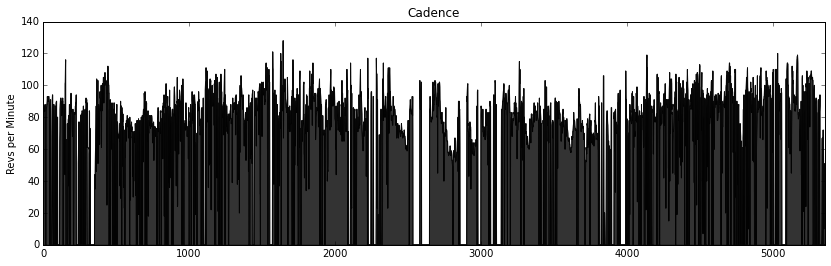

In [82]:
_ = df.cadence.plot(kind = 'area', figsize=(14, 4), color='black', alpha=.8)
plt.ylabel('Revs per Minute')
plt.title('Cadence')

In [7]:
print("Number of missing cadence data points is {:,}"\
.format( number_data_points - df.cadence.count() ) )

Number of missing cadence data points is 46


In [67]:
def find_missing(x):
    if math.isnan(x):
        return True
    else:
        return False

In [71]:
print( find_missing('NaN') )


TypeError: a float is required

In [8]:
df[ df.cadence.isnull() == True ].head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time
109,75.400002,NaN,1977.489990,103,53.361328,-6.214706,2015-09-13T06:31:08
110,75.400002,NaN,1983.209961,106,53.361323,-6.214791,2015-09-13T06:31:10
238,80.400002,NaN,5270.680176,107,53.354209,-6.256836,2015-09-13T06:39:29
301,80.199997,NaN,6618.569824,111,53.350090,-6.273613,2015-09-13T06:43:35
302,80.199997,NaN,6628.750000,109,53.350090,-6.273765,2015-09-13T06:43:37


In [43]:
df.cadence[ df.cadence.isnull() == True ].fillna(True).head()

109    1
110    1
238    1
301    1
302    1
Name: cadence, dtype: float64

In [29]:
df_missing = pd.DataFrame(index = df.index)

In [30]:
df_missing['cadence'] = df.cadence[ df.cadence.isnull() == True ].fillna(True)

In [92]:
df_missing['cadence2'] = df.cadence.apply(find_missing)
df_missing['distance'] = df.distance.apply(find_missing)
df_missing['distance2'] = df.distance.apply(lambda x: pd.isnull(x) )
df_missing['cadence3'] = df.cadence.apply(lambda x: math.isnan(x) and True or False)
df_missing['cadence4'] = df.cadence.apply(lambda x: True if math.isnan(x) else False)

In [73]:
df_missing['cadence2'].head()

0    False
1    False
2    False
3    False
4    False
Name: cadence2, dtype: bool

In [31]:
df_missing.cadence.fillna(False, inplace=True)

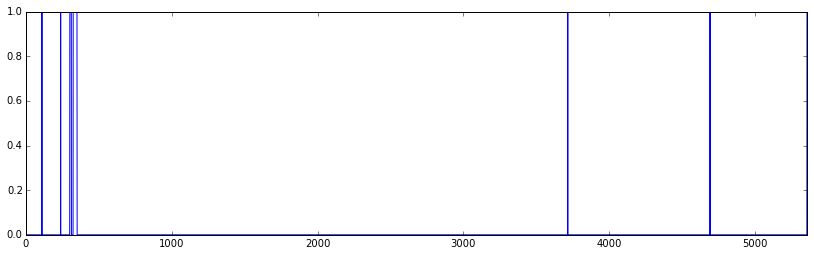

In [93]:
df_missing.cadence4.plot(figsize=(14, 4))

In [53]:
xx = df[ df.cadence.isnull() == True ].index.tolist()

In [44]:
df_missing.cadence.bool().head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [65]:
df_missing.head()

0    76
1    83
2    84
3    85
4    87
Name: cadence, dtype: float64

In [66]:
df.cadence[ df.cadence.isnull() == True ].head()

109   NaN
110   NaN
238   NaN
301   NaN
302   NaN
Name: cadence, dtype: float64

In [24]:
# if cadence is missing then set to -1
# this means we account for all cadence values, and can identify missing values later
df.cadence.fillna(method='ffill', inplace = True)

In [25]:
print('Cadence data type is {}'.format(df.cadence.dtype) )
print('Setting data type is int')
df.cadence = df.cadence.astype('int')
print('Cadence data type is {}'.format(df.cadence.dtype) )

Cadence data type is float64
Setting data type is int
Cadence data type is int64


### Check distance for missing values

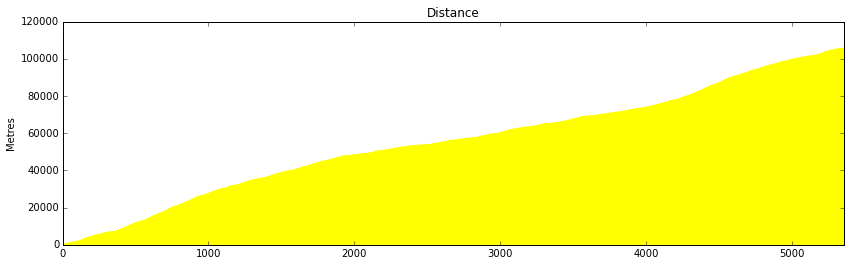

In [39]:
plt.ylabel('Metres')
plt.title('Distance')
_ = df.distance.plot(kind = 'area', figsize=(14, 4), color='yellow')

In [27]:
print("Number of missing distance data points is {:,}"\
.format( number_data_points - df.distance.count() ) )

Number of missing distance data points is 11


In [28]:
df.distance.fillna(method='ffill', inplace = True) # last know value method

In [29]:
print("Number of missing distance data points is {:,}"\
.format( number_data_points - df.distance.count() ) )

Number of missing distance data points is 0


### Check latitude,longitude for missing values

In [30]:
print("Number of missing longitude data points is {:,}"\
.format( number_data_points - df.longitude.count() ) )
print("Number of missing latitude data points is {:,}"\
.format( number_data_points - df.latitude.count() ) )

Number of missing longitude data points is 11
Number of missing latitude data points is 11


In [31]:
df.longitude.fillna(method='ffill', inplace = True) # last know value method
df.latitude.fillna(method='ffill', inplace = True) # last know value method

In [32]:
print("Number of missing longitude data points is {:,}"\
.format( number_data_points - df.longitude.count() ) )
print("Number of missing latitude data points is {:,}"\
.format( number_data_points - df.latitude.count() ) )

Number of missing longitude data points is 0
Number of missing latitude data points is 0


### Create Computed Column for Distance difference

In [29]:
df['distance_diff'] = df['distance'].diff()
df['cadence_diff'] = df['cadence'].diff()
df['heart_rate_diff'] = df['heart_rate'].diff()
df['altitude_diff'] = df['altitude'].diff()

In [38]:
df['distance_diff'].iloc[0] = 0
df['cadence_diff'].iloc[0] = 0
df['heart_rate_diff'].iloc[0] = 0
df['altitude_diff'].iloc[0] = 0

In [34]:
print("Number of missing distance difference data points is {:,}"\
.format( number_data_points - df.distance_diff.count() ) )

Number of missing distance difference data points is 1


In [36]:
df[ df.cadence_diff.isnull() == True ]

,altitude,cadence,distance,heart_rate,latitude,longitude,time,distance_diff,cadence_diff,heart_rate_diff,altitude_diff


In [37]:
df[ df.distance_diff.isnull() == True ]

,altitude,cadence,distance,heart_rate,latitude,longitude,time,distance_diff


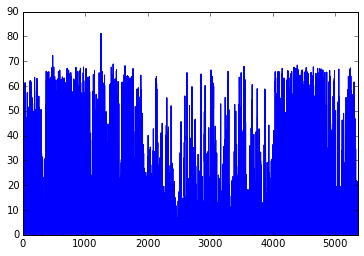

In [38]:
_ = df.distance_diff.plot(kind = 'area')

In [39]:
df.head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time,distance_diff,cadence_diff,heart_rate_diff,altitude_diff
0,79.400002,76,5.010000,103,53.363708,-6.190183,2015-09-13T06:25:51,0.000000,0,0,0.000000
1,90.800003,83,28.090000,106,53.363761,-6.190519,2015-09-13T06:25:56,23.080000,7,3,11.400002
2,90.800003,84,34.740002,106,53.363779,-6.190614,2015-09-13T06:25:57,6.650002,1,0,0.000000
3,90.800003,85,40.650002,108,53.363817,-6.190668,2015-09-13T06:26:00,5.910000,1,2,0.000000
4,90.800003,87,52.090000,110,53.363877,-6.190771,2015-09-13T06:26:03,11.439999,2,2,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f95d3166da0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f95d3099d68>], dtype=object)

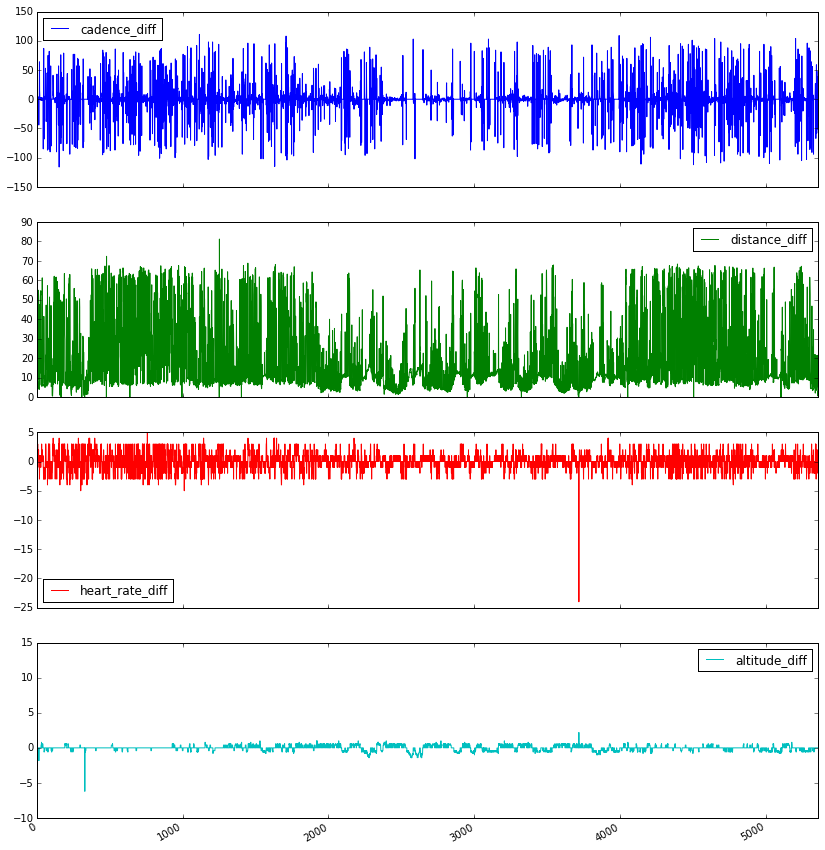

In [44]:
df[['cadence_diff','distance_diff','heart_rate_diff','altitude_diff']].plot(figsize=(14, 16),subplots=True)

In [60]:
df.to_csv(output_file_path)